# Entrega N° 2 - Visualizaciones


|Autor|Fecha|
|:----:|:----:|
|Francisco Tagliavini|2023-10-16|


# Cargo las librerias que voy a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leo el dataset (archivo.csv)
* Me fijo si se lee bien con los primeros 3 registros

In [2]:
df = pd.read_csv('dataset.csv')
df.head(3)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Pruebo con el método info()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       47879 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education-num   48842 non-null  int64 
 6   marital-status  48842 non-null  object
 7   occupation      47876 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital-gain    48842 non-null  int64 
 12  capital-loss    48842 non-null  int64 
 13  hours-per-week  48842 non-null  int64 
 14  native-country  48568 non-null  object
 15  income          48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


# sigo analizando el tamaño del data set

In [7]:
df.shape

(48842, 16)

## Analizo los campos numericos media, mediana, min, max y percentiles

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,48842.0,24420.500000,14099.615261,0.0,12210.25,24420.5,36630.75,48841.0
age,48842.0,38.643585,13.710510,17.0,28.00,37.0,48.00,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.50,178144.5,237642.00,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.00,10.0,12.00,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.00,0.0,0.00,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.00,0.0,0.00,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.00,40.0,45.00,99.0


## Veo los campos disponibles

In [34]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

## Consulto por lo tipos de datos del string...

In [27]:
df.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

**Los campos numericos son todos de tipo Integer**

## Reviso que campos tienen NaN y su cantidad

In [31]:
df.isna().sum()

Unnamed: 0          0
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

total de registros del dataset son más de 48.000 y encontramos algo así como 2.000 NaN
Son campos del tipo objeto (string)
tendríamos que analizar si corresponden a un mismo registro:
* No parece conveniente eliminar el campo o columna, la perdida es significativa (20%)
* Se podría analizar el reemplazo con un valor de la MODA
* Se podría eliminar esos registros que continen un NaN (5%)

# Analizo valores repetidos o categorias de cada campo

In [12]:
df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [13]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [16]:
df['education-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education-num, dtype: int64

In [18]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [19]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [21]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [23]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [25]:
df['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [26]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: capital-gain, Length: 123, dtype: int64

In [30]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: capital-loss, Length: 99, dtype: int64

# Diccionario de campos y variables

* age numerico entero - puedo analizar la distribución de rango etarios de la población del dataset (74 categorias de edad)
* workclass: string (8 categorias) hay un valor no definido 
* fnlwgt: 
* education: string (16 categorias)
* education-num: numerico entero
* marital-status: string (7 categorias)
* occupation: string (15 categorias)
* relationship: string (6 categorias)
* race: string (6 categorias)
* sex: string (2 categorias)
* capital-gain:
* capital-loss:
* hours-per-week:
* native-country:
* income:

|Variable Name|Role|Type|Demographic|Description|Units|Missing Values|
|:----|:----|:----|:----|:----|:----|:----|
|age|Feature|Integer|Age|N/A||no|
|workclass|Feature|Categorical|Income|Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked||yes|
|fnlwgt|Feature|Integer||||no|
|education|Feature|Categorical|Education Level|Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool||no|
|education-num|Feature|Integer|Education Level|||no|
|marital-status|Feature|Categorical|Other|Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|||no|
|occupation|Feature|Categorical|Other|Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|||yes|
|relationship|Feature|Categorical|Other|Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried|||no|
|race|Feature|Categorical|Race|White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|||no|
|sex|Feature|Binary|Sex|Female, Male|||no|
|capital-gain|Feature|Integer||||no|
|capital-loss|Feature|Integer||||no|
|hours-per-week|Feature|Integer||||no|
|native-country|Feature|Categorical|Other|United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|||yes|
|income|Target|Binary|Income|>50K, <=50K||no|

# vamos con los gráficos de MATPLOTLIB

In [44]:
#Me fijo los estilos disponibles
import matplotlib as mpl
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [41]:
#Selecciono un estilo
mpl.style.use('bmh')

## Análisis univariable

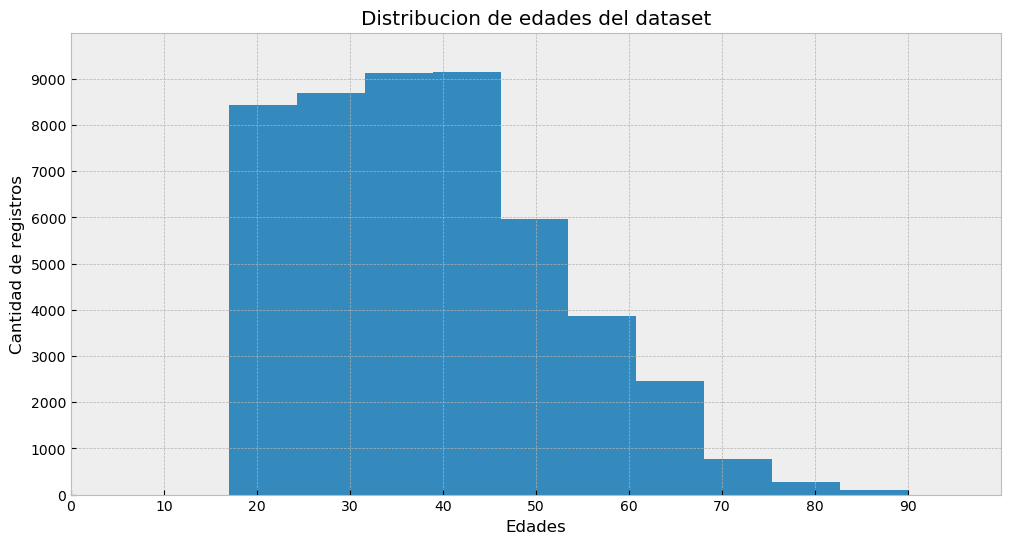

In [218]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df['age'])
ax.set_title('Distribucion de edades del dataset')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad de registros')
ax.set(xlim=(0, 100), xticks=np.arange(0, 100,10),
       ylim=(0, 10000), yticks=np.arange(0, 10000,1000))
plt.show()

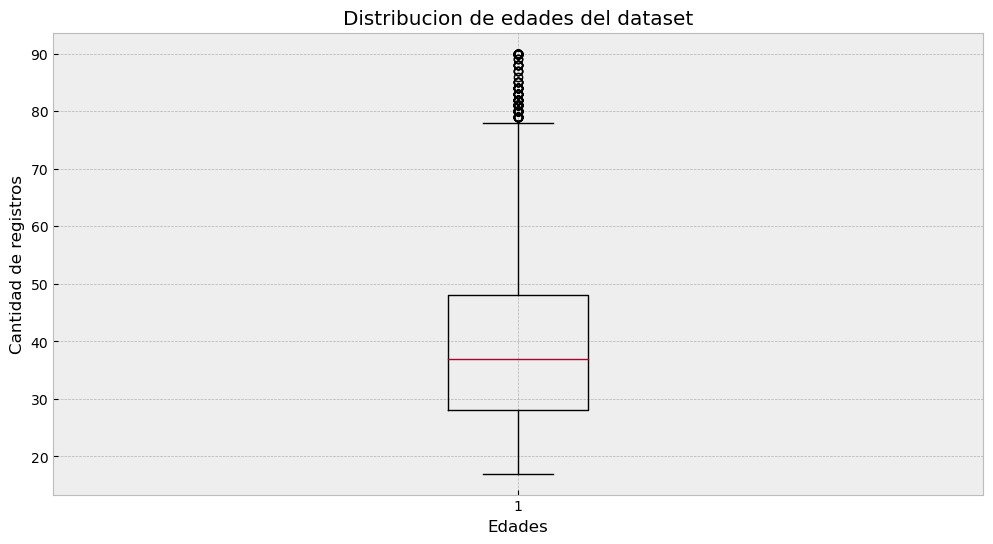

In [230]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(df['age'])
ax.set_title('Distribucion de edades del dataset')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad de registros')

plt.show()

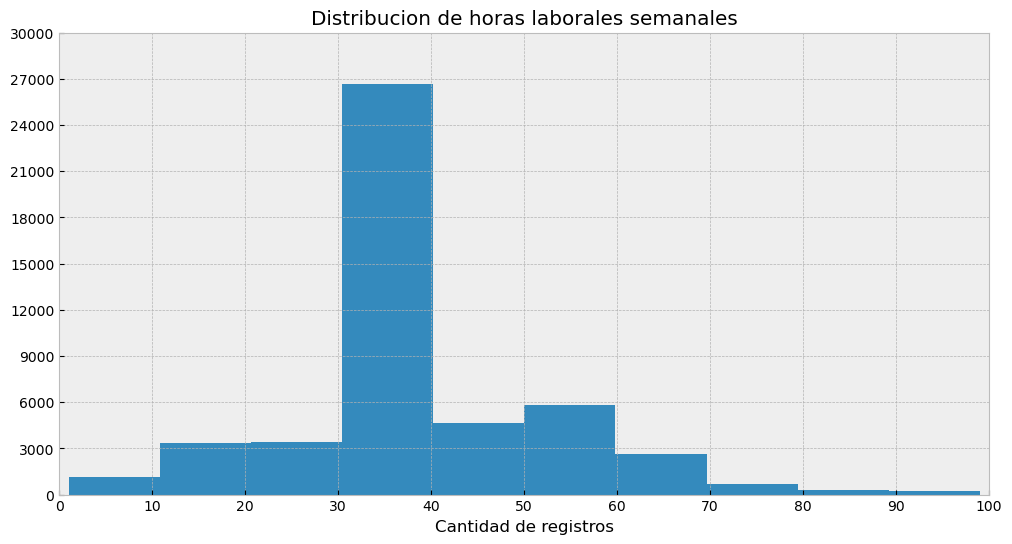

In [228]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df['hours-per-week'])
ax.set_title('Distribucion de horas laborales semanales')
ax.set_xlabel('Cantidad de registros')
ax.set_ylabel('')
ax.set(xlim=(0, 100), xticks=np.arange(0, 110,10),
       ylim=(0, 30000), yticks=np.arange(0, 33000,3000))
plt.show()

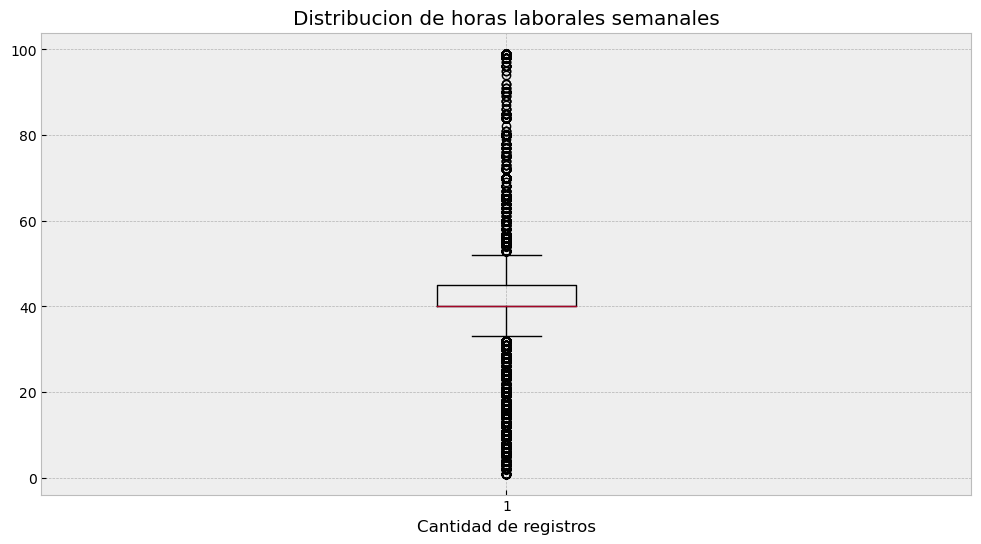

In [232]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(df['hours-per-week'])
ax.set_title('Distribucion de horas laborales semanales')
ax.set_xlabel('Cantidad de registros')
ax.set_ylabel('')

plt.show()

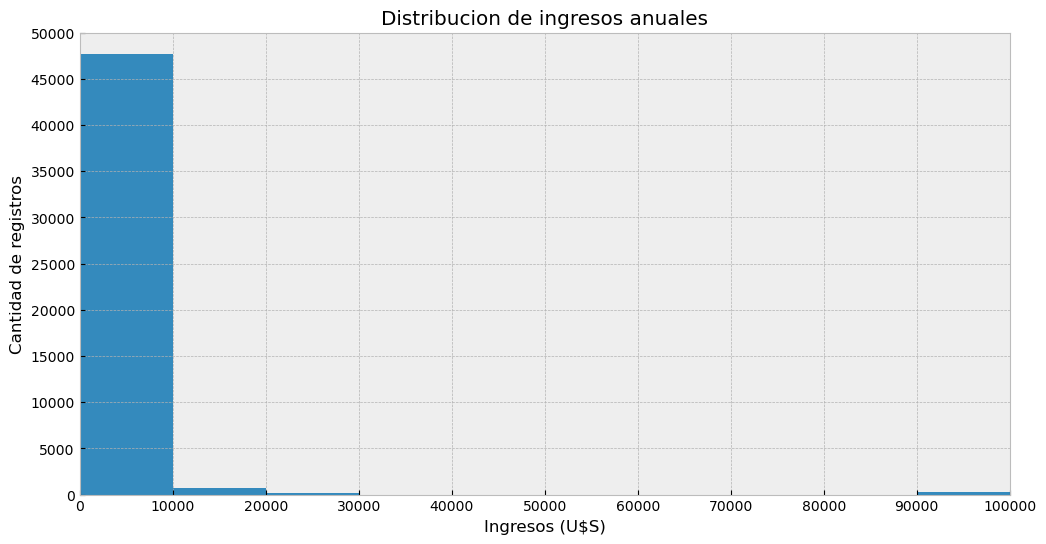

In [229]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df['capital-gain'])
ax.set_title('Distribucion de ingresos anuales')
ax.set_xlabel('Ingresos (U$S)')
ax.set_ylabel('Cantidad de registros')
ax.set(xlim=(0, 100000), xticks=np.arange(0, 110000,10000),
       ylim=(0, 50000), yticks=np.arange(0, 55000,5000))
plt.show()

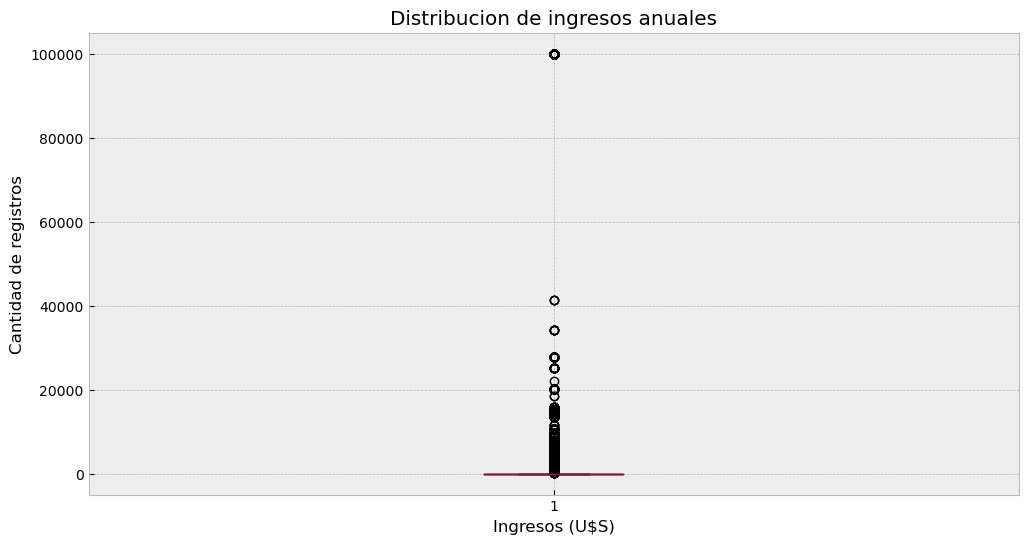

In [233]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(df['capital-gain'])
ax.set_title('Distribucion de ingresos anuales')
ax.set_xlabel('Ingresos (U$S)')
ax.set_ylabel('Cantidad de registros')

plt.show()

## Análisis multivariado

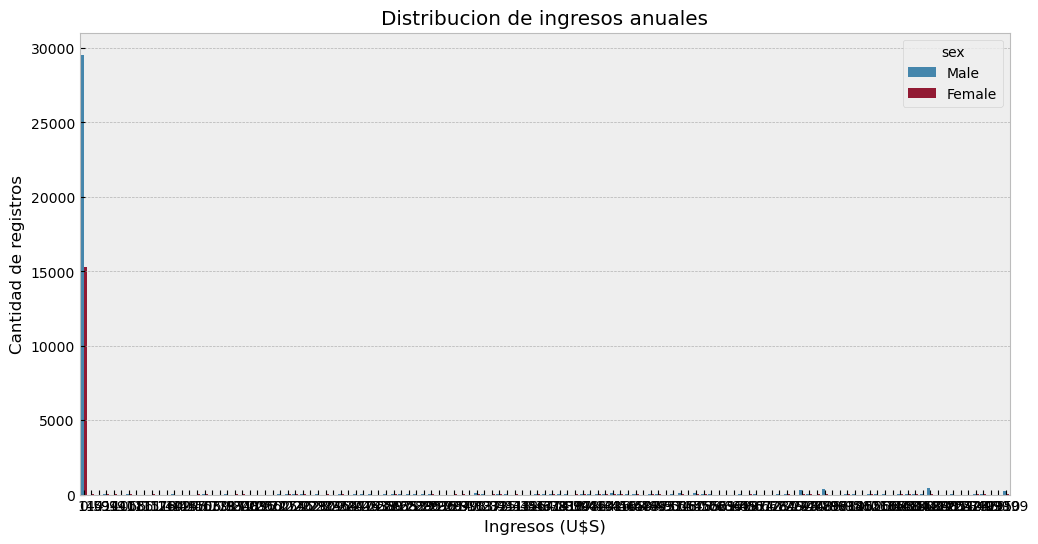

In [267]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['capital-gain'],hue=df['sex'],data=df)
ax.set_title('Distribucion de ingresos anuales')
ax.set(xlabel='Ingresos (U$S)', ylabel='Cantidad de registros')

plt.show()

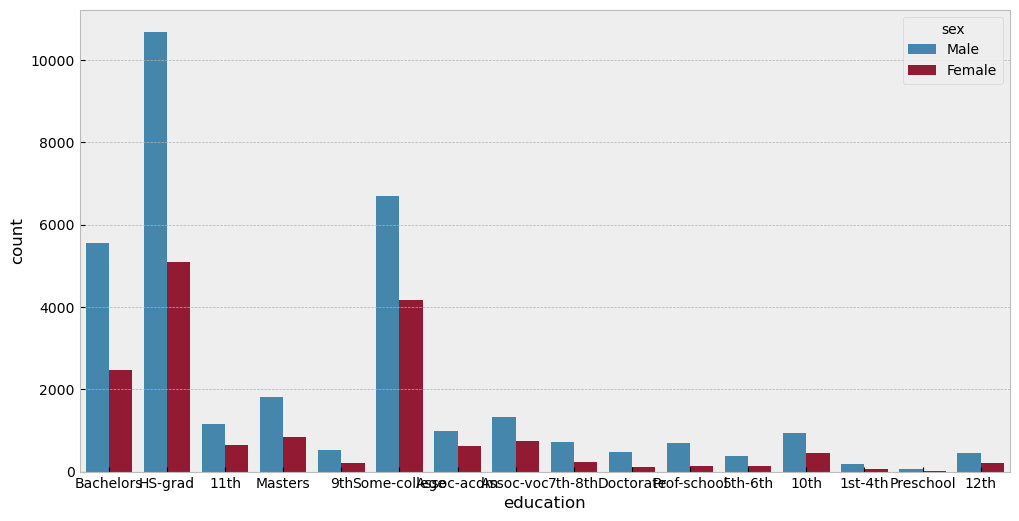

In [272]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['education'],hue=df['sex'],data=df)
plt.show()